## Project II - Programming for Data Analysis
****
### Problem Statement

This project will investigate the Wisconsin Breast Cancer dataset. The following list presents the
requirements of the project
- Undertake an analysis/review of the dataset and present an overview and background.
- Provide a literature review on classifiers which have been applied to the dataset and compare their performance
- Present a statistical analysis of the dataset
- Using a range of machine learning algorithms, train a set of classifiers on the dataset (using SKLearn etc.) and present classification performance results. Detail your rationale for the parameter selections you made while training the classifiers.
- Compare, contrast and critique your results with reference to the literature
- Discuss and investigate how the dataset could be extended – using data synthesis of new tumour datapoints
- Document your work in a Jupyter notebook.
- As a suggestion, you could use Pandas, Seaborn, SKLearn, etc. to perform your analysis.
- Please use GitHub to demonstrate research, progress and consistency
****

#### Dataset Information

For this project I am using the original Wisconsin Breast Cancer dataset imported from UCI machine learning repository. This is a multivariate classification dataset, which records the measurements for breast cancer cases. There are two classes; benign and malignant, denoted by numbers 2 and 4 respectively. The malignant class of this dataset is considered as outliers, while points in the benign class are considered inliers. There are 699 samples that have 11 attributes with 16 missing values. The 9 other attributes are ranged from 1 to 10. Pathologists assigned these numbers based on their characteristics. See tables below for initial information on the dataset.

There has been numerous research works done on this dataset with the aim to be able to predict the liklihood of breast cancer in patients.   

As a first step in this project I will read in the data set and use some basic commands to understand the data set and name it for use later in my statistical analysis.

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt


In [49]:
# importing the Wisconsin Breast Cancer dataset from UCI Machine Learning Repository using Pandas
# note we are missing column names so I need to add these in using names function and taking names from attributes section on UCI website
# naming dataset "wbc" using initials of the dataset

wbc = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data",
                 names = ["Sample code number", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class"])

In [50]:
wbc.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [51]:
wbc.tail()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [52]:
# to determine no. of rows and no. of columns
wbc.shape

(699, 11)

****
#### Classifiers

Breast cancer is an unfortunately very common disease with ongoing research being done with the aim to amend the outcome for patients from a terminal illness to a treatable illness.

Current statistics in Ireland: __[1](https://www.breastcancerireland.com/education-awareness/facts-and-figures/)__
- 1 in 9 women will develop breast cancer in the course of their lifetime.
- Incidence of male breast cancer is 1 in 1000.
- There are 3,700 new cases of breast cancer diagnosed each year.
- 23% of women are diagnosed between the ages of 20-50 years.
- 34% of women are diagnosed between the ages of 50-69 years.
- 36% of women are diagnosed over the age of 70 years.
- Only 5%-10% of breast cancer cases are hereditary.




Using machine learning methods is an effective way to classify data, and interest in the application of machine learning to the design, conduct, and analysis of clinical trials has grown. Machine learning has the potential to help improve the success and efficiency of clinical trials. __[2](https://trialsjournal.biomedcentral.com/articles/10.1186/s13063-021-05489-x)__

In our dataset we have missing values and machine learning can be used in several different ways to address the problem of missing data but it has more value in the collection of new data sets where it can ensure a reduction in errors when collecting the data during research. We will remove the missing values for the purpose of this project.

A very effective use of machine learning is to generate risk predictions in retrospective datasets that can be considered in future research and a big part of that is classification. 

Checking the data set for any null values is important as machine learning algorithms cannot handle null values. We have to either eliminate the records with null values or replace them with the mean/median of the other values. 

We can see below each of the variables are printed with number of null values. This data set has no null values denoted by the zeroes.

In [53]:
#checking for null values

wbc.isnull().sum()


Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [54]:
# we know there are missing values and in the data set these have been replaced with a '?'
#we want to avoid Not a Number (NaN) errors 
# and as only 2.3% missing values I will remove the rows with a non numeric value


data = wbc.drop(index=[23,40,139,145,158,164,235,249,275,292,294,297,315,321,411,617])



In [55]:
# to check NaNs are removed
data.isna().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [56]:
# to check revised shape which is rectangular; 10 columns with 683 rows
data.shape

(683, 11)

****
#### Classifiers - Literature Review

Papers
- An Evaluation of the Wisconsin Breast Cancer Dataset using Ensemble Classifiers and RFE Feature Selection Technique
- Analysis of the Wisconsin Breast Cancer Dataset and Machine Learning for Breast Cancer Detection _[3](file:///C:/Users/daith/Downloads/monther,+12300-Article+Text-36825-1-6-20210211.pdf)
- A Linear Discriminant Analysis and Classification Model for Breast Cancer Diagnosis _[4](file:///C:/Users/daith/Downloads/applsci-12-11455.pdf)_

In both papers only two classifiers are compared using the Wisconsin Breast Cancer dataset. In the first the performance of the classifiers; random forest and extreme gradient boosting are compared. The second paper focusses on the Bayesian classiﬁer called Bayesian Networks and the J48. From the variables in the data set the aim is to determine whether or not the patient has breast cancer. The main objective of the research is to assess the accuracy of the classifiers with respect to their efficiency and effectiveness in classifying the dataset.

The random forest is a classification algorithm consisting of many decisions trees. Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees.
_[5](https://en.wikipedia.org/wiki/Random_forest)_

Extreme Gradient Boost classifier works by building a succession of weak decision tree learners, with each new tree trying to reduce the error of the previous one. Recent studies by researchers has been able to highlight that some classifiers have more success rate in performing classification tasks in comparison to other classifiers. The extreme gradient boost classifier is categorized as one of such classifiers. This classifier is designed to increase the computational speed and efficiency of the machine used in performing the experiment.  

A Bayesian network is a compact, flexible and interpretable representation of a joint probability distribution. Bayesian networks are ideal for taking an event that occurred and predicting the likelihood that any one of several possible known causes was the contributing factor. For example, a Bayesian network could represent the probabilistic relationships between diseases and symptoms. Given symptoms, the network can be used to compute the probabilities of the presence of various diseases. A Bayesian network is learned from data. _[6](https://www.uib.no/en/rg/ml/119695/bayesian-networks#:~:text=A%20Bayesian%20network%20is%20a,network%20is%20learned%20from%20data.)_

J48 algorithm is one of the most widely used machine learning algorithms to examine the data categorically and continuously. The C4.5 algorithm (J48) is mostly used among many fields for classifying data for example interpreting the clinical data e.g. interpreting the clinical data for the diagnosis of coronary heart disease, classifying E-governance data, etc. _[7](https://medium.com/@nilimakhanna1/j48-classification-c4-5-algorithm-in-a-nutshell-24c50d20658e)_

The first part of the research is to discuss how the data set was prepared to ensure the data set was in the correct format to buikd the classifiers e.g. the first column was excluded as above and the records with missing values removed. 
The following issues with the dataset were observed:
- missing data
- small dataset size
- various ranges of data values
- unbalanced data
- skewed data

The data set was then split 80:20 where 80% was the training set and 20% was the test set. The research discusses how they modelled the training data and evaluated it against the test data to predict the outcome. All of the data sets variables were used. They were able to demonstrate that the extreme gradient boost classifier performed the classification task better than random forest classifier. Extreme gradient boost had the highest classification accuracy with 98.53% against 97.07% for random forest.

The second paper performed the same tests on both their classifiers for comparison. The Bayesian Networks classifier was good with imbalanced data (97.80% oaccuracy), but it does not deal with missing values. The J48 was found to be a less accurate classiﬁer, with a higher rate of false-negatives (96.05% of accuracy). 

Both papers investigated the use of two ensemble machine learning classifiers for cancer diagnosis on the Wisconsin Breast Cancer Dataset. It compared the classifiers to find the best classification accuracy. The research was limited to just two machine learning classifiers and would have benefitted by including other classifiers for broader comparison.

The third paper looked at a broader rangge of algorithms including Linear Discriminant Analysis (LDA). LDA is a method for simplifying classification problems in supervised machine learning. In order to use it the author outlined that it requires distinguishing between two or more variables and therefore is used for modeling data set differences. It is often used to reduce the number of variables in a data set while still retaining the important information for classification.

Drawbacks of Linear Discriminant Analysis _[8](https://www.kaggle.com/code/bhatnagardaksh/pca-and-lda-implementation)_

- It assumes that the data is normally distributed, which may not always be the case in real-world data sets.
- It assumes that the variables are statistically independent, which is also not always the case in real-world data sets.
- It is sensitive to outliers, which can affect the accuracy of the model.
- It can only be used for two-class classification problems, and does not work well with multi-class problems.
- It is not suitable for data sets with a large number of features, as it can become computationally expensive.

****

#### Statistical Analysis

Performing statistical analysis on our data set allows us to understand and be able to describe our data and what it can tell us. A necessary aspect of working with data is the ability to describe, summarise, and represent data visually. Python statistics libraries are comprehensive, popular, and widely used tools that will assist you in working with data._[9](https://realpython.com/python-statistics/)_

Descriptive statistics is about describing and summarising data using two main approaches:
- The quantitative approach describes and summarises data numerically
- The visual approach illustrates data with charts, plots, histograms, and other graphs

Univariate analysis is the analysis of a single variable and bivariate analysis is the study of statistical relationships amongst a pair of variables. Similarly, a multivariate analysis is concerned with multiple variables at once.

The types of measures in statistical analysis are:
- Central tendency tells you about the centres of the data e.g. the mean, median, and mode
- Variability describes the spread of the data. Useful measures include variance and standard deviation.
- Correlation or joint variability describes the relationship between a pair of variables in a dataset e.g. covariance and the correlation coefficient.

The population is a set of all elements or items that you’re interested in. Populations are often vast, which makes them inappropriate for collecting and analysing data therefore we use a subset of the population called a sample. Ideally, the sample should preserve the essential statistical features of the population to a satisfactory extent. That way, you’ll be able to use the sample to glean conclusions about the population.

An outlier is a data point that differs significantly from the majority of the data taken from a sample or population. There are many possible causes of outliers, e.g:
- Natural variation in data
- Change in the behaviour of the observed system
- Errors in data collection

Data collection errors are a particularly prominent cause of outliers. For example, the limitations of measurement instruments or procedures can mean that the correct data is simply not obtainable. Other errors can be caused by miscalculations, data contamination, human error, and more.

Python is widely used for statistical data analysis by using data frame objects such as pandas. Statistical analysis of data includes importing, cleaning, transformation, etc. of data in preparation for analysis. The dataset of the CSV file is considered to be analyzed by python libraries which process every data from preprocessing to end result. _[10](https://www.educba.com/statistical-analysis-in-python/)_

The dependent variable in the Wisconsin Breast Cancer data set is whether the patient has a benign or malignant tumor. 

In [57]:
# a very simple command to describe the data in the data set is the describe() method, it provides most measures of quantitive
#statistical analysis

data.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


<AxesSubplot:>

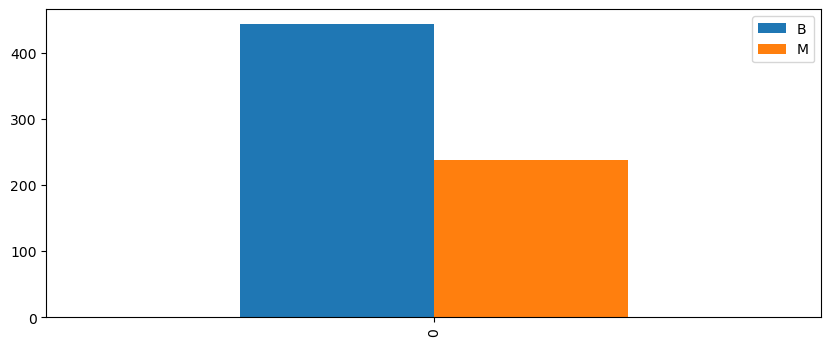

In [58]:
#simple histogram to show the number of samples that are benign or malignant

data_B = data[data['Class'] == 2]
data_M = data[data['Class'] == 4]
B_M_data = {'B': [data_B.shape[0]], 'M': [data_M.shape[0]]}
B_M_df = pd.DataFrame(data=B_M_data)
B_M_df.plot(kind='bar', figsize=(10,4))

#we can see there are roughly 2/3 benign (not harmful) and 1/3 malignant (cancerous)

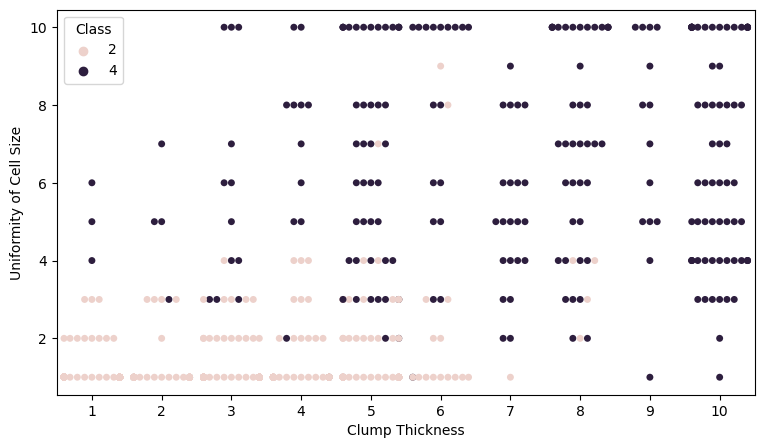

In [59]:
#swarmplot
import warnings
warnings.filterwarnings('ignore')
f=plt.figure(figsize=(9,5))
sns.swarmplot(x=data['Clump Thickness'], y=data['Uniformity of Cell Size'], hue=data['Class'])
plt.show()

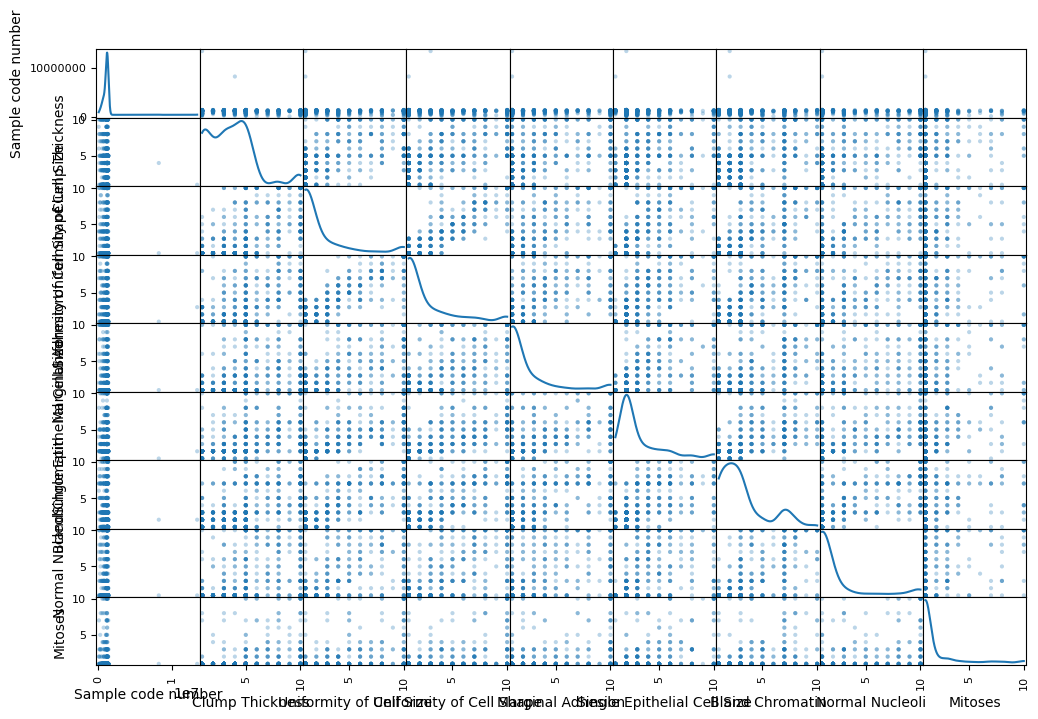

In [60]:
#to check for skewness

diagnosis = data['Class']
features = data.drop(['Class'], axis = 1)
pd.plotting.scatter_matrix(features, alpha = 0.3, figsize = (12,8), diagonal = 'kde');

#### Clump Thickness
****

Clump thickness is a measure of how densely packed the cells of a tumor are. It is an important factor in determining the prognosis of a cancer patient. Clump thickness is used to classify tumors into different types, such as solid or non-solid. Solid tumors tend to be "thicker" and can be more difficult to treat. Less dense tumors tend to be benign and often be treated more easily. This can be easily seen from some of the initial analysis performed on the data set.

In [61]:
# Contingency Table (frequency table)
# this table is used to summarise the relationship between two variables
# we will compare clump thickness for benign and malignant tumors
# very quickly we can see malignant cases increase with clump thinkness

pd.crosstab(index=data['Class'], columns=data['Clump Thickness'], margins=True)

Clump Thickness,1,2,3,4,5,6,7,8,9,10,All
Class,,,,,,,,,,,
2,136,46,92,67,83,15,1,4,0,0,444
4,3,4,12,12,45,18,22,40,14,69,239
All,139,50,104,79,128,33,23,44,14,69,683


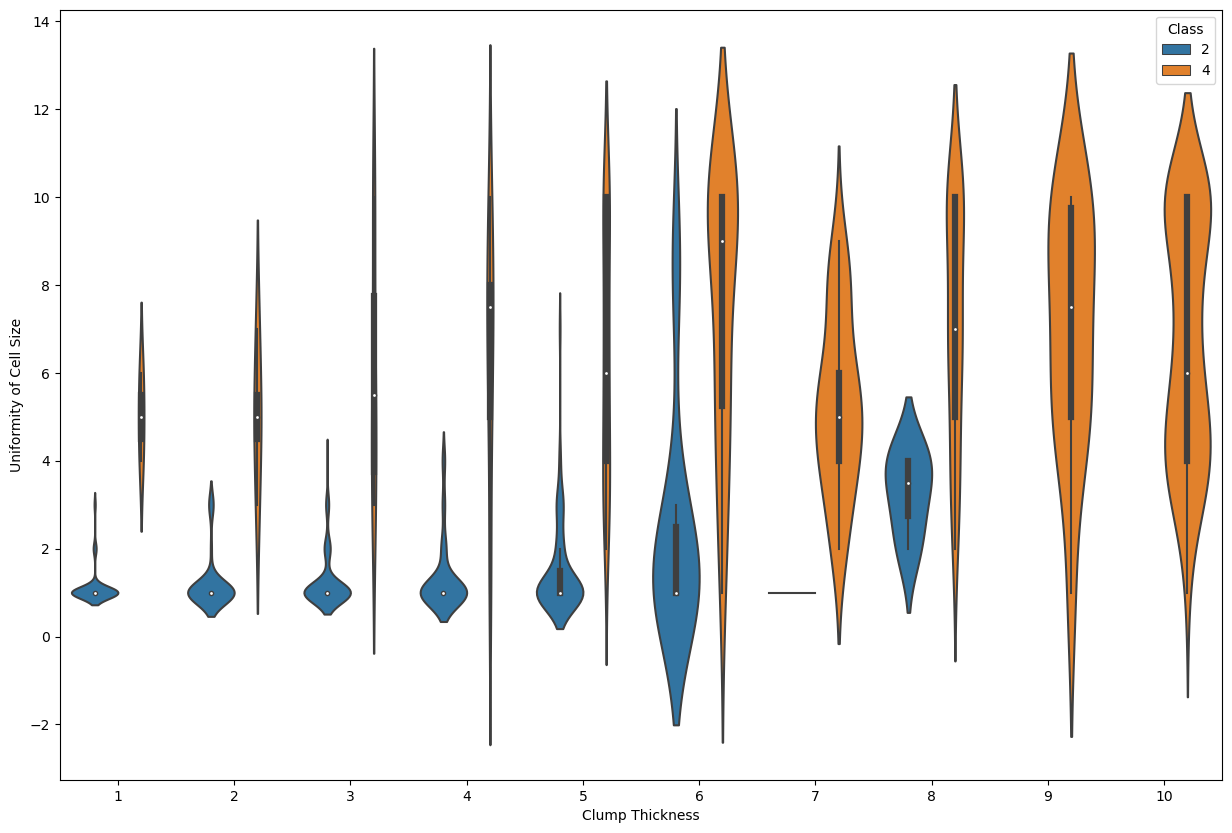

In [62]:
#violinplot

f=plt.figure(figsize=(15,10))
sns.violinplot(x=data['Clump Thickness'], y=data['Uniformity of Cell Size'], hue=data['Class'])
plt.show()

****
### Statistical Analysis Findings


LR: 0.679327 (0.099205)
LDA: 0.954276 (0.030737)
KNN: 0.598889 (0.033971)
CART: 0.943333 (0.036792)
NB: 0.844343 (0.046835)
SVM: 0.657508 (0.050131)


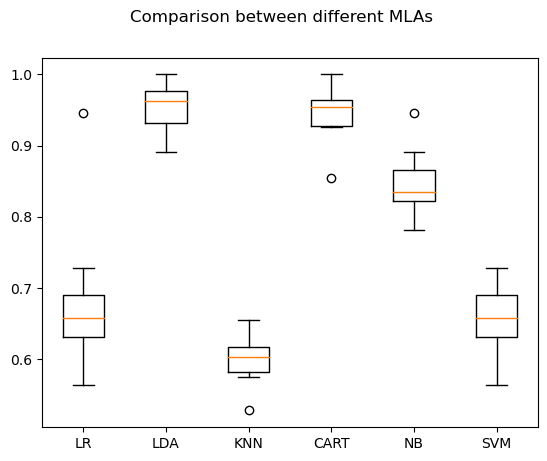

In [63]:
#Comparing Machine Learning Algorithms (MLAs) are important to come out with the best-suited algorithm for a particular problem.

#Importing sklearn modules
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.exceptions import FitFailedWarning
import warnings
warnings.filterwarnings('ignore') # setting ignore as a parameter to remove FutureWarning message


# Creating variables for analysis
x=data.iloc[:,:-1].values
y=data['Class']

# Splitting train and test 80:20
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=50)

# Application of all Machine Learning methods
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=None)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Comparison between different MLAs')
ax = fig.add_subplot()
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


Above I split the data set into two parts, with $80%$ being training data and $20%$ being testing data and carried out a comparative analysis of various classification algorithms to determine which was giving the highest accuracy on my data set.

We can see that the best accuracy for our data set is found with Linear Discriminant Analysis (LDA) at 95.4% and Classification and Regresssion Tree (CART) algorithm at 94.3%. K Nearest Neighbor (KNN) gave the lowest accuracy at 59.9%. 

Next I will use these tools to improve the accuaracy.

****
#### Linear Discriminant Analysis (LDA) 

In [64]:
# Create an instance of LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
# Fit the model to the data and transform the data using the fit
x_lda = lda.fit_transform(x, y)
# Print the shape of the original data and the transformed data
print("Original Data shape:",x.shape, "\nModified Data shape:", x_lda.shape)

Original Data shape: (683, 10) 
Modified Data shape: (683, 1)


In [65]:
x_train, x_test, y_train, y_test = train_test_split(x_lda, y, test_size=0.2, random_state=50)

In [66]:
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [67]:
LDAtrain_preds = lda.predict(x_train)
confusionmatrix = np.around(confusion_matrix(y_train, LDAtrain_preds, normalize='true'),3)

#Plotting the Confusion Matrix
import plotly.express as px

fig = px.imshow(confusionmatrix, 
                template='simple_white',
                text_auto=True, 
                aspect="auto", 
                labels=dict(x="Predicted Label", y="Correct Label", color='Value'))
fig.update_xaxes(side="bottom")
fig.show()

In [68]:
print(len(y_train[y_train!=LDAtrain_preds]),'cases out of', len(y_train), 
      'cases are being misclassified by the LDA which gives us an error rate of', 
      np.around((len(y_train[y_train!=LDAtrain_preds])/len(y_train)*100),3))

24 cases out of 546 cases are being misclassified by the LDA which gives us an error rate of 4.396


****
#### Classification and Regresssion Tree (CART)

CART is a decision tree algorithm in machine learning which helps in the prediction of target variable considering other variables. Decision Tree develops classification or regression models in a tree format. Decision tree are easy to understand as the problem is solved in a tree representation._[11](https://norma.ncirl.ie/4284/1/simithasitaramshetty.pdf)_

CART is a machine learning algorithm which is implemented using the `train()` method. The method parameter in `train()` is given the value as `rpart` as the implementation of CART in `R` is known as `RPART`. The other parameters are the predictor variables and the prediction variables selected from feature selection. Classification trees are used when the dataset needs to be split into classes that belong to the response variable. In our data set, the classes benign or malignant.



In [69]:
dt = DecisionTreeClassifier()

dt.fit(x_train, y_train)


DecisionTreeClassifier()

In [70]:
# prediction
dt.score(x_test, y_test)

0.9781021897810219

In [71]:
expected_y  = y_test
predicted_y = dt.predict(x_test)

In [72]:
#print the classification report and confusion matrix for the classifier.

from sklearn import metrics

print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

           2       0.97      1.00      0.98        85
           4       1.00      0.94      0.97        52

    accuracy                           0.98       137
   macro avg       0.98      0.97      0.98       137
weighted avg       0.98      0.98      0.98       137

[[85  0]
 [ 3 49]]


In [73]:
#Setup the Data for regressor
#Here, we are using DecisionTreeRegressor as a Machine Learning model to fit the data.
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
    

DecisionTreeRegressor()

In [74]:
#Now we have predicted the output by passing x_test and also stored real target in expected_y.

expected_y  = y_test
predicted_y = dtr.predict(x_test)

In [75]:
#Here we have printed r2 score and mean squared log error for the Regressor.
#source [12] https://www.projectpro.io/recipes/use-classification-and-regression-tree-in-python

print(metrics.r2_score(expected_y, predicted_y))
print(metrics.mean_squared_log_error(expected_y, predicted_y))

0.9070135746606335
0.0057140763042900725


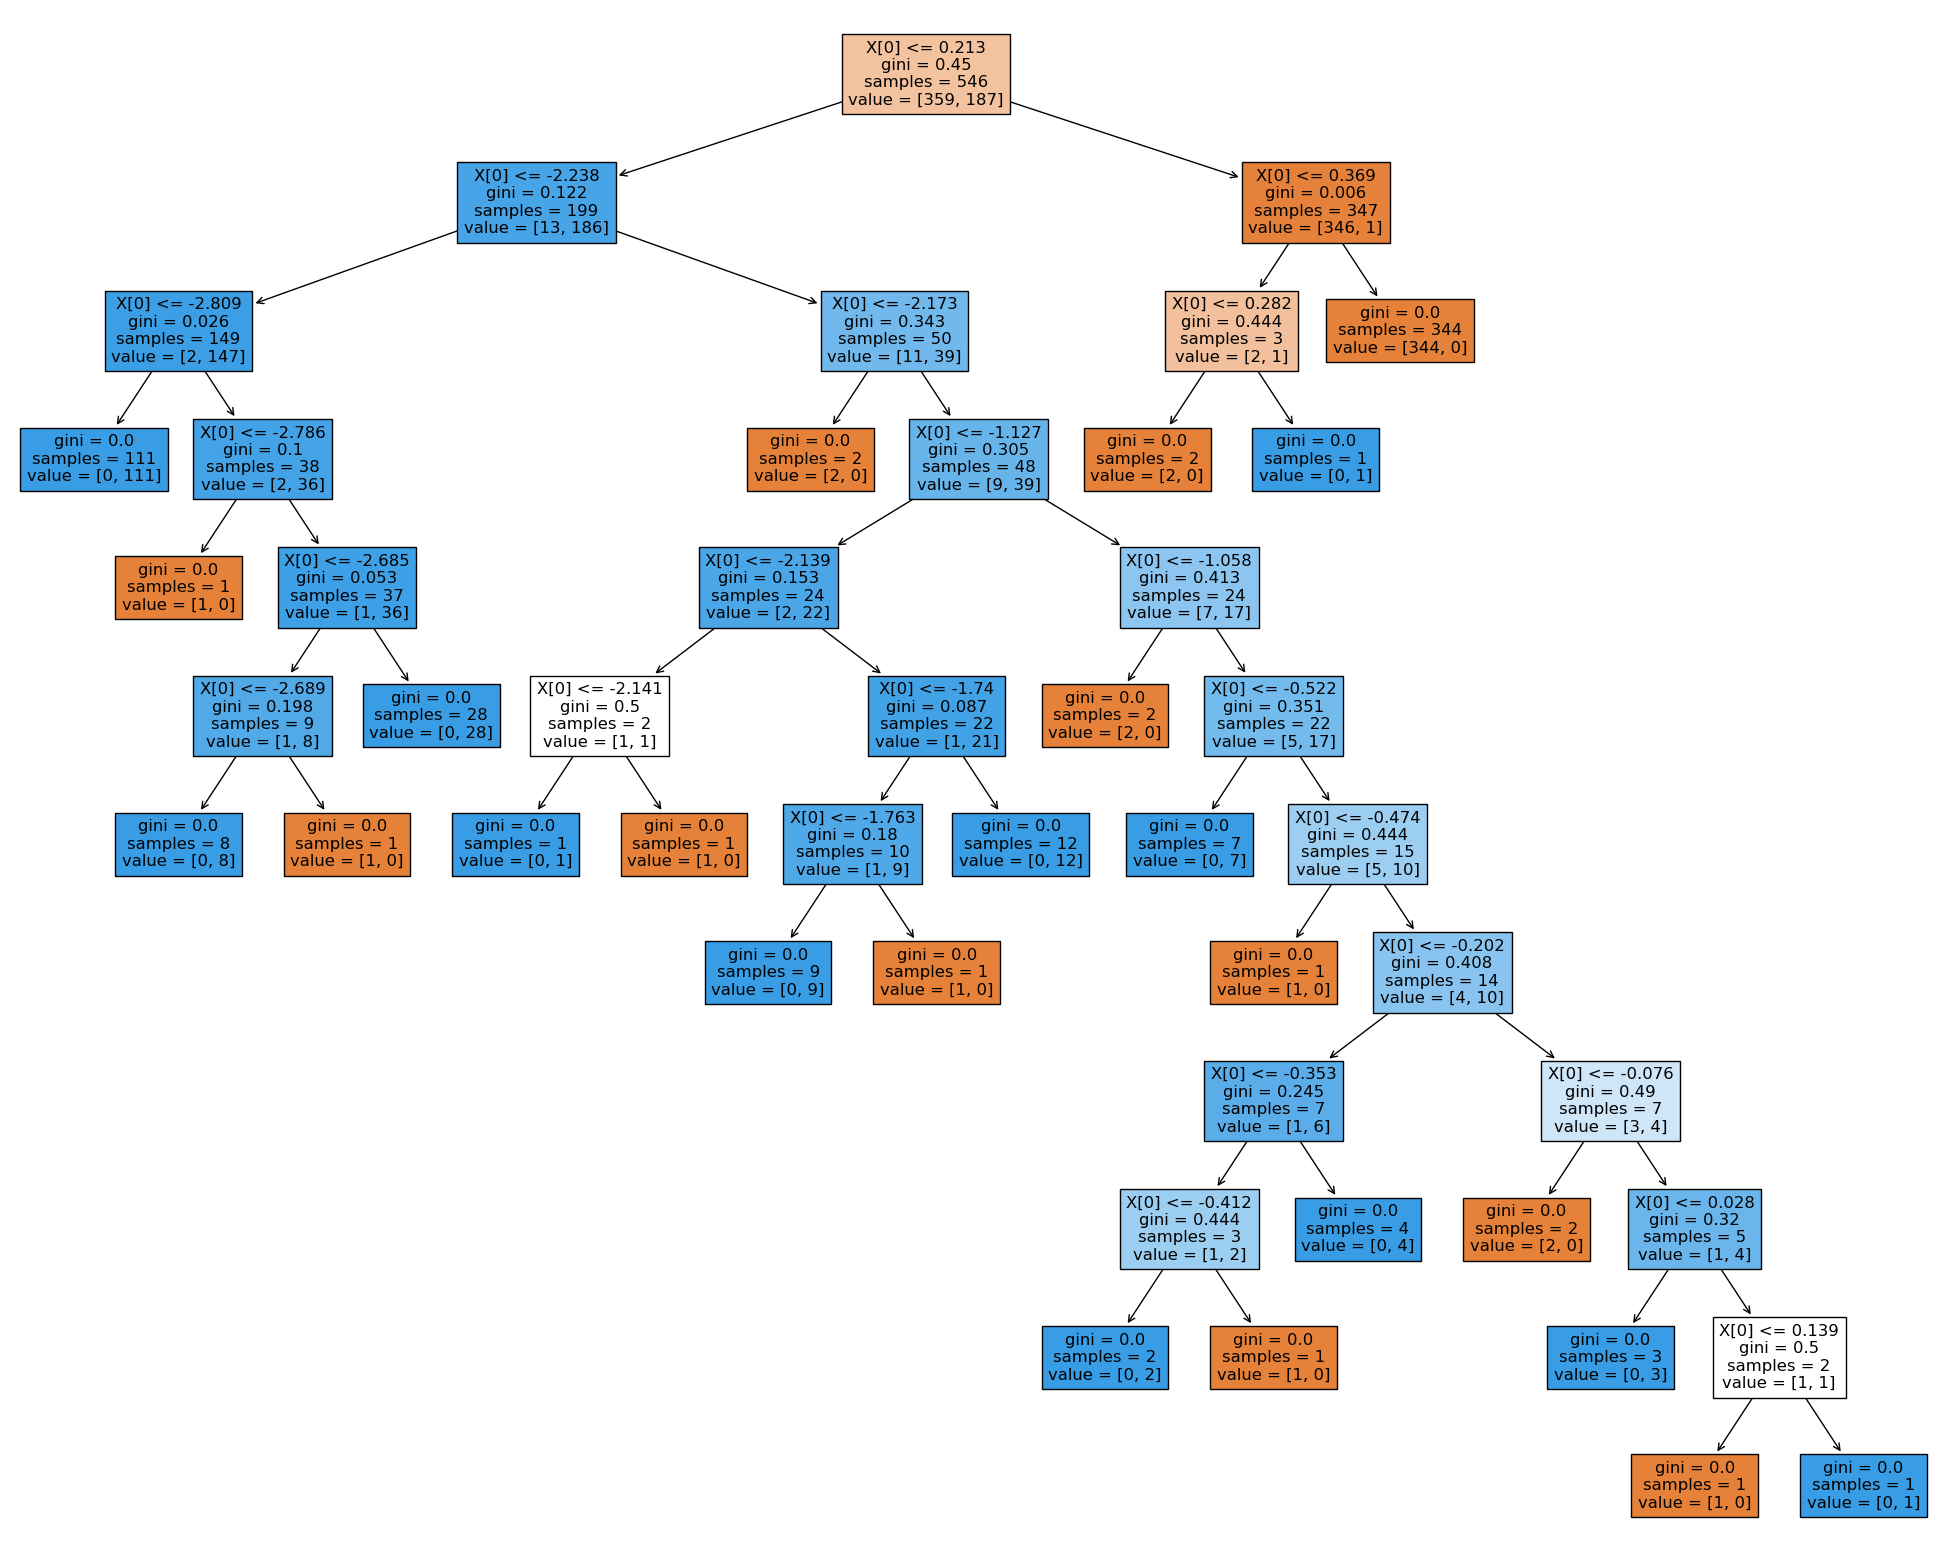

In [76]:
#visualising the tree
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, filled=True)

# I’m using filled=True in the plot_tree. 
#When this parameter is set to True the method uses color to indicate the majority of the class. 

****
#### K Nearest Neighbor (KNN)

The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.

The KNN algorithm can compete with the most accurate models because it makes highly accurate predictions. Therefore, you can use the KNN algorithm for applications that require high accuracy but that do not require a human-readable model. The quality of the predictions depends on the distance measure._[13](https://www.ibm.com/docs/en/ias?topic=knn-usage)_

K-Nearest Neighbors Algorithm is one of the most simple and easily interpretable supervised machine learning algorithm. One specialty of K-NN is that, it does not have a separate training phase. The algorithm takes the whole data as training set. . KNN can be used to solve both classification and regression problems, however, it is generally used to solve classification problems._[14](https://www.linkedin.com/pulse/breast-cancer-identification-using-k-nearest-neighbors-subeesh-a)_

In [77]:
from sklearn.model_selection import cross_val_score
nbrs = []
cv_scores = []
for k in range(1,40):
   nbrs.append(k)
   knn = KNeighborsClassifier(n_neighbors = k)
   scores = cross_val_score(knn,x_train,y_train,cv=10, scoring = 'accuracy')
   cv_scores.append(scores.mean())
print(cv_scores)

[0.9614814814814816, 0.9541750841750842, 0.9597643097643097, 0.9579124579124578, 0.967104377104377, 0.9652861952861953, 0.9689562289562289, 0.9708080808080808, 0.9689562289562289, 0.9725925925925925, 0.9725925925925925, 0.9725925925925925, 0.9725925925925925, 0.9725925925925925, 0.9725925925925925, 0.9744444444444443, 0.9744444444444443, 0.9744444444444443, 0.9744444444444443, 0.9708080808080807, 0.9726262626262626, 0.9726262626262626, 0.9726262626262626, 0.9707744107744107, 0.9744444444444443, 0.9744444444444443, 0.9744444444444443, 0.9726262626262626, 0.9726262626262626, 0.9708080808080807, 0.9708080808080807, 0.9689562289562289, 0.9689562289562289, 0.9689562289562289, 0.967138047138047, 0.9707744107744107, 0.9707744107744107, 0.9725925925925927, 0.9725925925925927]


The above are the scores for each k using 10 fold cross validation. You can see that K=17-20 and K=26-28 are giving the best score and hence the least error. To be more specific, from this we can calculate the miss-classification error (1-CVScore) and identify the optimal value of k.

In [78]:
MSE = [1-x for x in cv_scores]

optimal_k = nbrs[MSE.index(min(MSE))]

print('The optimal value of K (neighbors) is %d ' %optimal_k)

The optimal value of K (neighbors) is 16 


Text(0, 0.5, 'Mean Error')

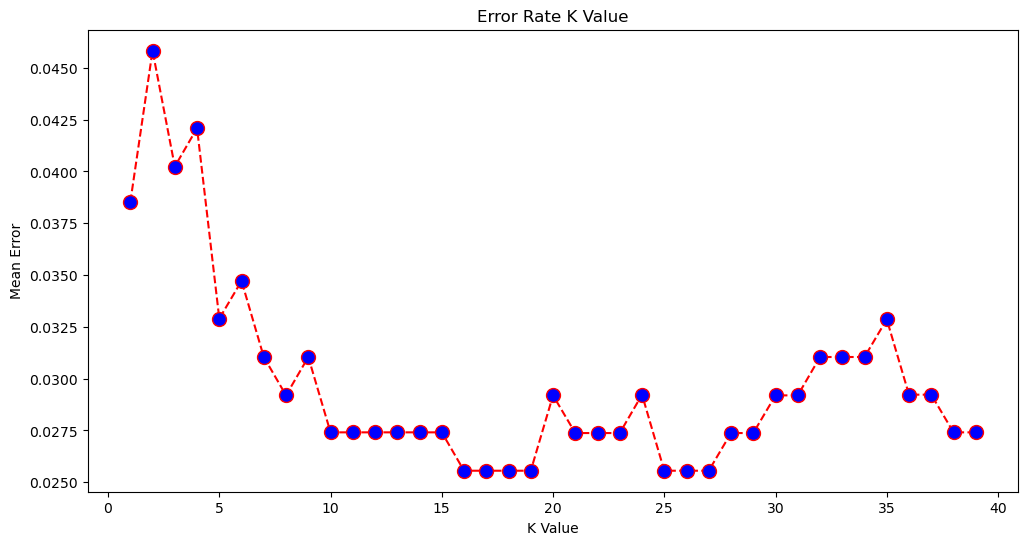

In [79]:
# to visualise the scores for each value of k;

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), MSE, color='red', linestyle='dashed', marker='o',
markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [80]:
knn = KNeighborsClassifier(n_neighbors = 16)

knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=None, n_neighbors=16, p=6, weights='uniform')

KNeighborsClassifier(n_neighbors=16, p=6)

In [81]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

acc=accuracy_score(y_test,predicted_y)

print(f'Accuracy Score of the Model: {acc}')

Accuracy Score of the Model: 0.9781021897810219


In [82]:
print('Confusion Matrix :\n')

print(confusion_matrix(y_test,predicted_y))


Confusion Matrix :

[[85  0]
 [ 3 49]]


****
#### Extending the Data Set

In the area of machine learning (ML) we can find our ML algorithms and their neural nets are getting larger and larger but the training data sets aren’t, and that can cause the algorithm to run into issues with accuracy. Algorithms are getting infinitely more complex, and neural nets are getting deeper and deeper. More layers in neural nets means more parameters that your model is learning from your data._[15](https://www.datarobot.com/blog/introduction-to-dataset-augmentation-and-expansion/)_

When the ML model is trying to understand a relationship this deeply, it needs a lot of examples to learn from. That’s why popular datasets for models like these might have something like 10,000 images for training. That size of data is not at all easy to come by. Therefore it's important to be able to augment your dataset to make it more effective without the need to acquire loads of more training data.Data expansion is simply the procedure of multiplying each observation in the data by a factor that represents how many members of the population are represented by that observation. Whilst it is ideal to mine more data from the same source that we got our existing data from that may not be possible. We can use our ML algorithm but it would be generating new data based on our existing data. 

Generative Adversarial Networks _[16](https://towardsdatascience.com/generating-expanding-your-datasets-with-synthetic-data-4e27716be218)_  consists of two parties who are trying to compete with each other. One of them is trying to fool the other, and the other is trying to avoid this deception.

The two parties are a generator and a discriminator, both neural networks which try to compete with each other in the following fashion:

- The Generator tries to generate content that is ideally supposed to look like the real content, which can be image, text, or just numerical data in general. The generator is penalised if the discriminator is able to distinguish between real and generated content
- The discriminator tries to tell apart the generated content and the real content. The discriminator is penalised if it’s not able to distinguish between real and generated content

The end goal is for the generator to be able to produce data that looks so close to the real data that the discriminator can no longer avoid the deception, and this leaves us with more data than what we started with.

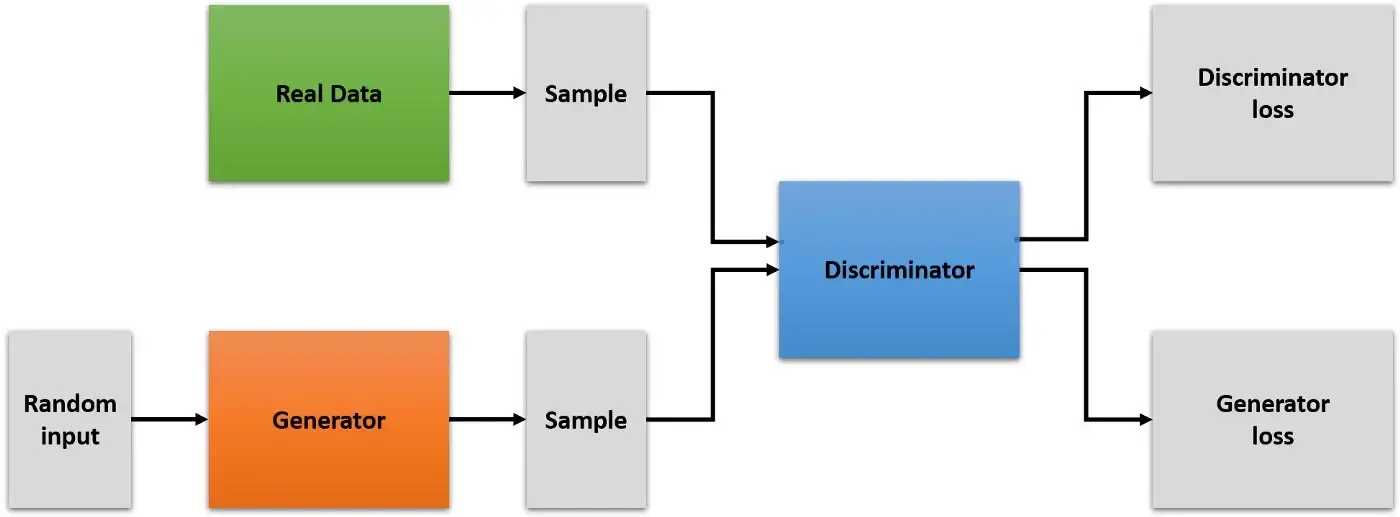

We can train our GAN model to syntesise the data of our tumor points.

In [83]:
# increasing our data set using a GAN model
# I used pip install sdv on my terminal in order to be able to run this code

from sdv.tabular import CTGAN
model = CTGAN()

from ctgan import CTGANSynthesizer

ctgan = CTGANSynthesizer(batch_size=50,epochs=5,verbose=False)
ctgan.fit(data)
samples = ctgan.sample(2000)
samples.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1315284,3,1,1,1,5,1.629206,2,1,1,2
1,1204845,3,1,0,11,2,11.066428,3,10,1,4
2,969189,1,1,1,1,2,1.410623,2,1,1,2
3,1072151,5,1,9,1,2,1.329914,3,1,1,2
4,720383,10,1,1,1,2,0.673586,3,2,1,2


In [84]:
# to show we now have an 2000 samples having increased our original data set

samples.shape

(2000, 11)

### Conclusion
****
Breast cancer is a leading cause of death amongst women worldwide and therefore early detection is the best way to increase the chance of treatment and recovery. By applying multiple classifier algorithms on medical datasets to perform predictive analysis about patients and their medical diagnosis e.g. here where we have used machine learning techniques to assess tumor behavior for breast cancer patients we are developing ways to predict and address outcomes for patients. Statistical analysis of data is the acquisition of knowledge about data in order to simplify the complex data which can be further used for processing. The job is effectively done by different libraries of python which effectively use for the analysis of data in less time. The goal of data analysis is to optimize the complex data structure. It helps us to take optimal decisions on data.

In my review of several papers and in my literature review I can see there have been numerous studies that have applied data mining algorithms on different medical datasets to classify Breast Cancer. These algorithms show good classification results and encourage many researchers to apply these kind of algorithms to solve challenging tasks. In this project I looked at Linear Discriminant Analysis (LDA), classification and regression tree (CART)  modelling and K nearest neighbor (KNN). LDA is beneficial for determining if a set of features can predict breast cancer. I used it in the initial stage of machine learning when setting up my training and testing models. CART then presented a more sophisticated snapshot of the relationship of variables in the data set and can be used as a first step in constructing an informative model or a final visualisation of important associations. CART analysis can guide medical researchers to isolate which of these variables is most important as a potential site of intervention._[17](https://www.bu.edu/sph/files/2014/05/MorganCART.pdf)_ In using these ML algoritms first we then applied our KNN, the accuracy rate on this rose form 59.8% to 98% after testing and training.

According to data from Gartner, by 2024, 60% of data used to develop machine learning and analytical applications will be synthetically generated._[18](https://www.datacamp.com/tutorial/creating-synthetic-data-with-python-faker-tutorial)_
We need synthetic data for user privacy, application testing, improving model performance, representing rare cases, and reducing the cost of operation.

- Privacy: to protect users' data. You can replace names, emails, and address with synthetic data. It will help us avoid cyber and black-box attacks where models infer the details of training data.
- Testing: application testing on real-world data is expensive. Testing database, UI, and AI applications on synthetics data is more cost-efficient and secure.
- Model Performance: generated synthetics data can improve model performance. For example: in image classifiers, we use the shearing, shifting, and rotating of images to increase the size of the dataset and improve model accuracy. 
- Rare Cases: we cannot wait for the rare event to occur and collect real-world data e.g. credit fraud detection, car crashes, and cancer data. 
- Cost: the data collection takes time and resources. It is costly to acquire real-world data, clean it, label it, and prepare it for testing or training models. 

I was able to apply a GAN model to increase my number of samples to 2000 based on the actual data collected addressing all the the points above. The model was even able to generate sample code numbers for each row of data.

Today we are are using various tools to process sensitive data and maintain data privacy. We are using synthetics data to improve model performance, reduce basis, test applications, and save cost in developing cutting-edge AI solutions. This project has shown the benefits of all this, from preparing the data set, removing missing values, training the data set to improve accuaracy and finally extending the dataset to avoid overcrowding in the chosen ML algorithm. In the future, this project will allow me the confidence to apply similar techniques to different classifiers and different datasets.

### References
****
1. https://www.breastcancerireland.com/education-awareness/facts-and-figures/
2. https://trialsjournal.biomedcentral.com/articles/10.1186/s13063-021-05489-x
3. file:///C:/Users/daith/Downloads/monther,+12300-Article+Text-36825-1-6-20210211.pdf
4. file:///C:/Users/daith/Downloads/applsci-12-11455.pdf
5. https://en.wikipedia.org/wiki/Random_forest
6. https://www.uib.no/en/rg/ml/119695/bayesian-networks#:~:text=A%20Bayesian%20network%20is%20a,network%20is%20learned%20from%20data
7. https://medium.com/@nilimakhanna1/j48-classification-c4-5-algorithm-in-a-nutshell-24c50d20658e
8. https://www.kaggle.com/code/bhatnagardaksh/pca-and-lda-implementation
9. https://realpython.com/python-statistics/
10. https://www.educba.com/statistical-analysis-in-python/
11. https://norma.ncirl.ie/4284/1/simithasitaramshetty.pdf
12. https://www.projectpro.io/recipes/use-classification-and-regression-tree-in-python
13. https://www.ibm.com/docs/en/ias?topic=knn-usage
14. https://www.linkedin.com/pulse/breast-cancer-identification-using-k-nearest-neighbors-subeesh-a
15. https://www.datarobot.com/blog/introduction-to-dataset-augmentation-and-expansion/
16. https://towardsdatascience.com/generating-expanding-your-datasets-with-synthetic-data-4e27716be218
17. https://www.bu.edu/sph/files/2014/05/MorganCART.pdf
18. https://www.datacamp.com/tutorial/creating-synthetic-data-with-python-faker-tutorial

#### Further Reading:
- https://www.youtube.com/watch?v=Q2pVjX2Umqk
- https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29
- https://www.journalbinet.com/uploads/2/1/0/0/21005390/67.02.09.2020_analysis_of_wisconsin_breast_cancer_original_dataset_using_data_mining_and_machine_learning_algorithms_for_breast_cancer_prediction.pdf
- https://towardsdatascience.com/deep-learning-in-winonsin-breast-cancer-diagnosis-6bab13838abd
- file:///C:/Users/daith/Downloads/monther,+12300-Article+Text-36825-1-6-20210211.pdf
- https://www.projectpro.io/recipes/compare-sklearn-classification-algorithms-in-python
- https://dibyendudeb.com/comparing-machine-learning-algoritms
- file:///C:/Users/daith/Downloads/applsci-12-11455.pdf